In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_fscore_support

In [29]:
# STEP 1: DATA LOADING & CLEANING
print("--- Step 1: Loading Dataset ---")
df = pd.read_csv("bank-additional-full.csv", sep=';')
df.replace('unknown', np.nan, inplace=True)

--- Step 1: Loading Dataset ---


In [30]:
# Fill missing values and Encode Categories
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna(df[col].mode()[0])
    df[col] = LabelEncoder().fit_transform(df[col])

print(f"Dataset Loaded. Shape: {df.shape}")
print(df.head())

Dataset Loaded. Shape: (41188, 21)
   age  job  marital  education  default  housing  loan  contact  month  \
0   56    3        1          0        0        0     0        1      6   
1   57    7        1          3        0        0     0        1      6   
2   37    7        1          3        0        1     0        1      6   
3   40    0        1          1        0        0     0        1      6   
4   56    7        1          3        0        0     1        1      6   

   day_of_week  ...  campaign  pdays  previous  poutcome  emp.var.rate  \
0            1  ...         1    999         0         1           1.1   
1            1  ...         1    999         0         1           1.1   
2            1  ...         1    999         0         1           1.1   
3            1  ...         1    999         0         1           1.1   
4            1  ...         1    999         0         1           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
0      


--- Step 2: Generating Correlation Matrix ---


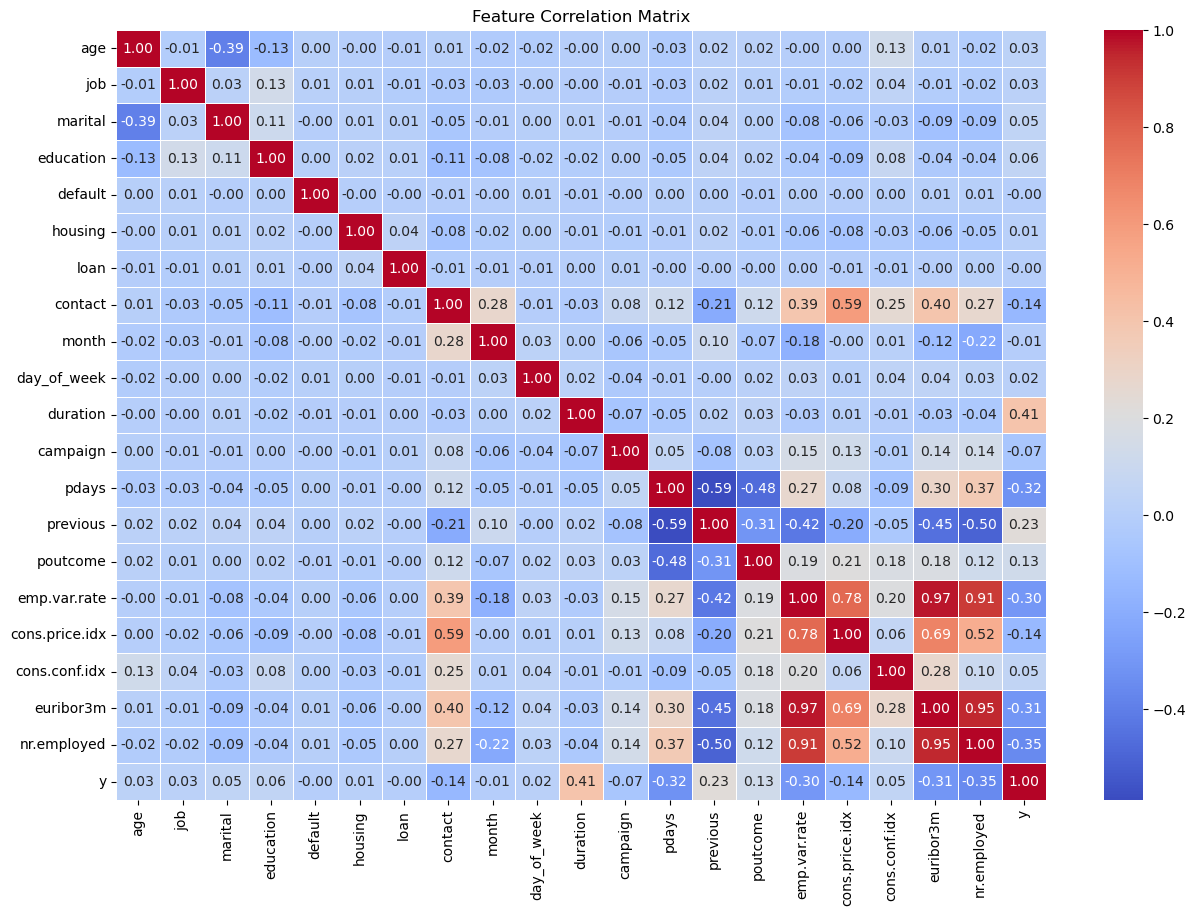

Correlation Matrix generated in plot window.


In [31]:
# STEP 2: FEATURE CORRELATION MATRIX
print("\n--- Step 2: Generating Correlation Matrix ---")
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()
print("Correlation Matrix generated in plot window.")

In [32]:
# STEP 3: DATA SPLITTING & SCALING
print("\n--- Step 3: Splitting and Scaling Data ---")
X = df.drop('y', axis=1)
y = df['y']


--- Step 3: Splitting and Scaling Data ---


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [34]:
# Scaling for KNN logic
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Data Split and Scaled successfully.")

Data Split and Scaled successfully.


In [35]:
# STEP 4: DECISION TREE (DT) IMPLEMENTATION
print("\n--- Step 4: Training Decision Tree (GridSearch) ---")
dt_params = {
    'criterion': ['entropy', 'gini'],
    'max_depth': [4, 6, 8],
    'class_weight': ['balanced']
}
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, cv=5)
dt_grid.fit(X_train, y_train)


--- Step 4: Training Decision Tree (GridSearch) ---


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['entropy', 'gini'],
                         'max_depth': [4, 6, 8]})

In [36]:
best_dt = dt_grid.best_estimator_
dt_pred = best_dt.predict(X_test)
print(f"Best DT Parameters: {dt_grid.best_params_}")

Best DT Parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 8}


In [37]:
# STEP 5: K-NEAREST NEIGHBORS (KNN) IMPLEMENTATION

In [38]:
print("\n--- Step 5: Training KNN (GridSearch) ---")
knn_params = {
    'n_neighbors': [5, 7, 9, 11],
    'weights': ['uniform', 'distance']
}
knn_grid = GridSearchCV(KNeighborsClassifier(metric='euclidean'), knn_params, cv=5)
knn_grid.fit(X_train_scaled, y_train)


--- Step 5: Training KNN (GridSearch) ---


GridSearchCV(cv=5, estimator=KNeighborsClassifier(metric='euclidean'),
             param_grid={'n_neighbors': [5, 7, 9, 11],
                         'weights': ['uniform', 'distance']})

In [39]:
best_knn = knn_grid.best_estimator_
knn_pred = best_knn.predict(X_test_scaled)
print(f"Best KNN Parameters: {knn_grid.best_params_}")

Best KNN Parameters: {'n_neighbors': 7, 'weights': 'uniform'}


In [40]:
# STEP 6: CLASSIFICATION REPORTS & CONFUSION MATRICES
print("\nDECISION TREE REPORT:")
print(classification_report(y_test, dt_pred))
print("\nKNN REPORT:")
print(classification_report(y_test, knn_pred))


DECISION TREE REPORT:
              precision    recall  f1-score   support

           0       0.99      0.84      0.91      9137
           1       0.42      0.91      0.58      1160

    accuracy                           0.85     10297
   macro avg       0.70      0.88      0.74     10297
weighted avg       0.92      0.85      0.87     10297


KNN REPORT:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      9137
           1       0.63      0.38      0.47      1160

    accuracy                           0.90     10297
   macro avg       0.78      0.67      0.71     10297
weighted avg       0.89      0.90      0.89     10297



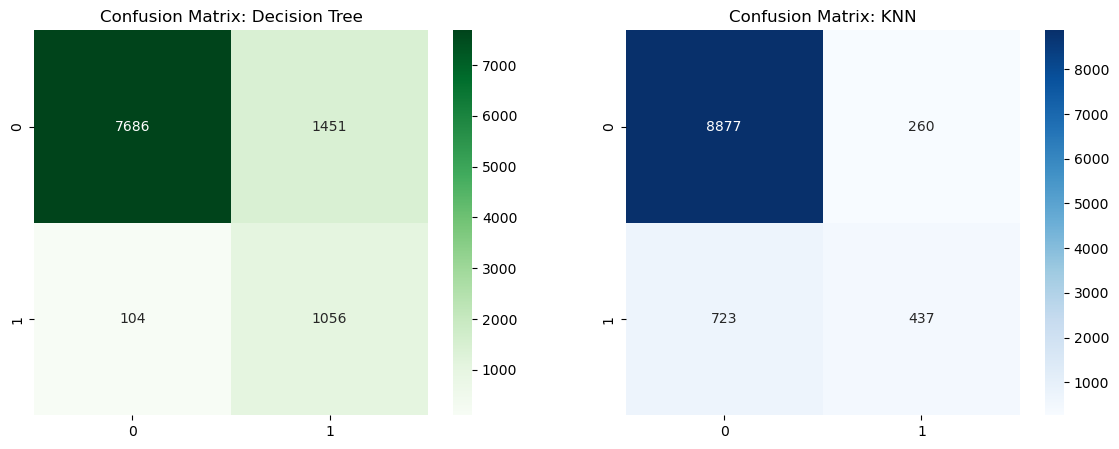

In [41]:
# Plot Confusion Matrices
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
sns.heatmap(confusion_matrix(y_test, dt_pred), annot=True, fmt='d', cmap='Greens', ax=ax[0])
ax[0].set_title('Confusion Matrix: Decision Tree')
sns.heatmap(confusion_matrix(y_test, knn_pred), annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Confusion Matrix: KNN')
plt.show()

In [42]:
# STEP 7: PERFORMANCE COMPARISON TABLE
print("\n--- Step 7: Final Performance Comparison ---")
def get_metrics(y_true, y_pred, name):
    acc = accuracy_score(y_true, y_pred)
    p, r, f, _ = precision_recall_fscore_support(y_true, y_pred, average='binary')
    return {'Model': name, 'Accuracy': acc, 'Precision': p, 'Recall': r, 'F1-Score': f}

comparison_df = pd.DataFrame([
    get_metrics(y_test, dt_pred, 'Decision Tree'),
    get_metrics(y_test, knn_pred, 'KNN')
])
print(comparison_df.to_string(index=False))


--- Step 7: Final Performance Comparison ---
        Model  Accuracy  Precision   Recall  F1-Score
Decision Tree  0.848985   0.421221 0.910345  0.575948
          KNN  0.904535   0.626973 0.376724  0.470652



--- Plotting Tree Logic ---


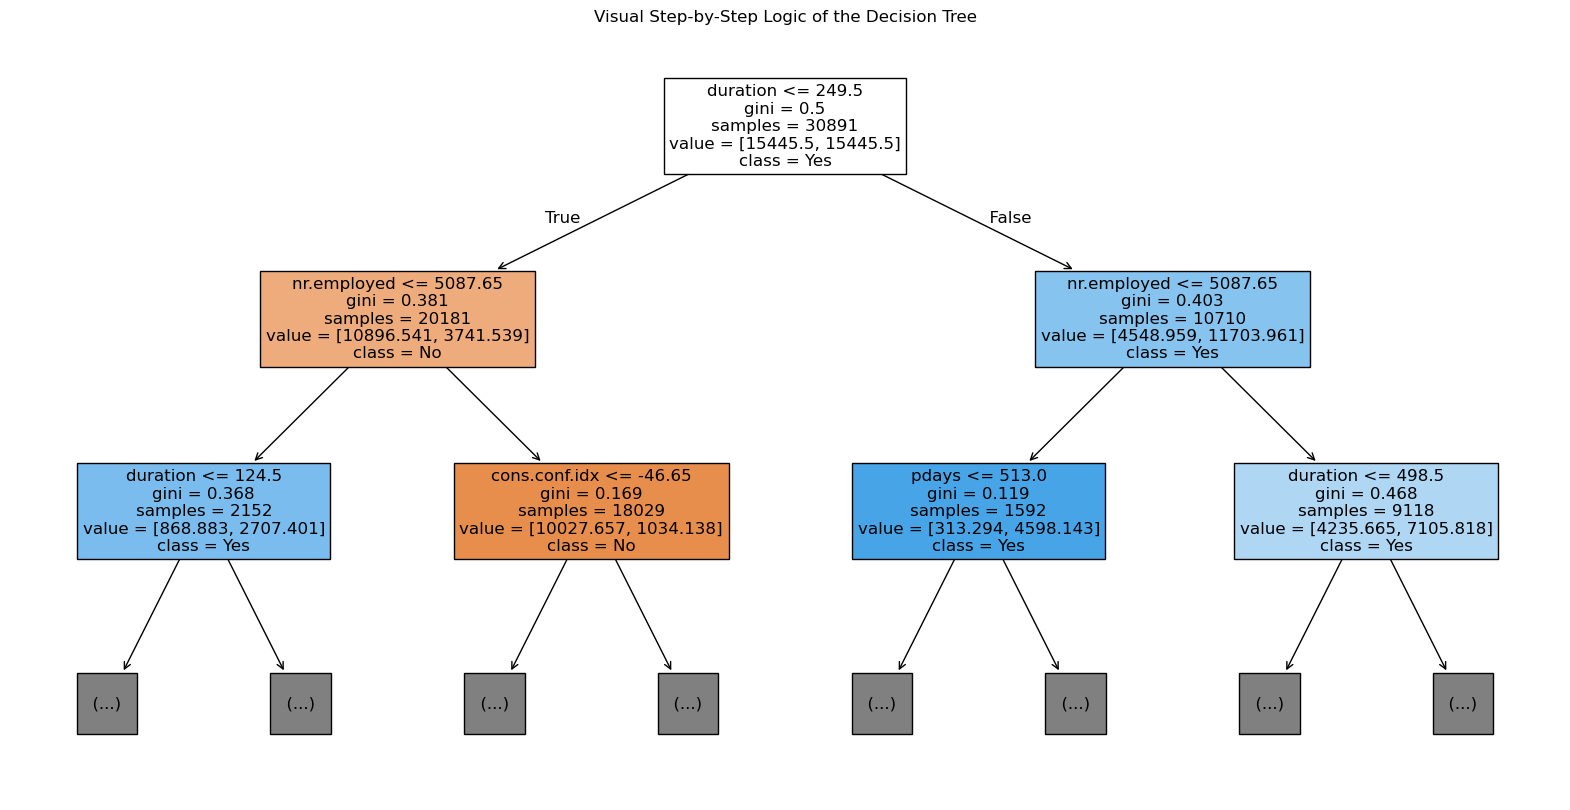

In [43]:
# Optional: Visualize Tree Logic
print("\n--- Plotting Tree Logic ---")
plt.figure(figsize=(20,10))
plot_tree(best_dt, max_depth=2, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, fontsize=12)
plt.title("Visual Step-by-Step Logic of the Decision Tree")
plt.show()